In [74]:
import sys
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Geometry import Point3D
from rdkit.Chem import Draw
from rdkit.Chem.rdDetermineBonds import DetermineBonds

import py3Dmol


In [2]:
m = Chem.MolFromSmiles('C')

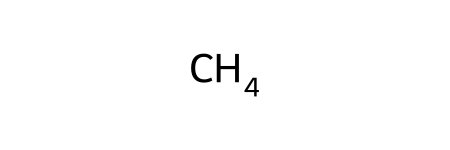

In [3]:
m

In [72]:
atypes = []
coords = []
energy = False
gradient = False
xyz = False

with open('moh.in') as inp:
  for l in inp:
    l=l.strip()

    if l == '*': xyz = False

    if xyz:
      s = l.split()
#      if s[0] != 'H':
      atypes.append(s[0])
      coords.append(list(map(float,s[1:])))

    if l == 'energy': energy = True
    if l == 'gradient': gradient = True

    if l == '* xyz': xyz = True

mol = Chem.RWMol()

idx = [ mol.AddAtom(Chem.Atom(a)) for a in atypes ]

conf = Chem.Conformer(mol.GetNumAtoms())
for i,c in enumerate(coords):
  conf.SetAtomPosition(i,Point3D(*c))

mol.AddConformer(conf)

view = py3Dmol.view(width=400, height=300)
view.addModel(Chem.MolToMolBlock(mol.GetMol()), 'mol')
view.setStyle({'stick': {}})
view.zoomTo()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [75]:
DetermineBonds(mol)

In [76]:
Chem.SanitizeMol(mol)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

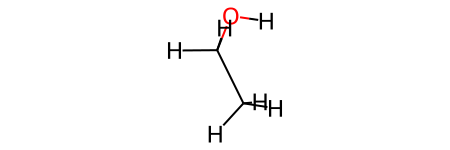

In [77]:
mol

In [6]:
conf

In [7]:
idx

[0, 1, 2, 3, 4, 5, 6, 7, 8]

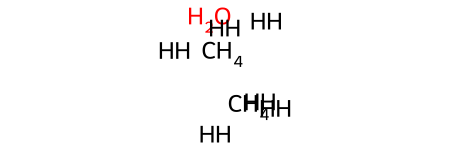

In [8]:
mol.GetMol()

In [12]:
mol=Chem.RWMol()

In [14]:
mol.AddAtom(Chem.Atom('C'),)

0

In [18]:
list(mol.GetAtoms())[0]

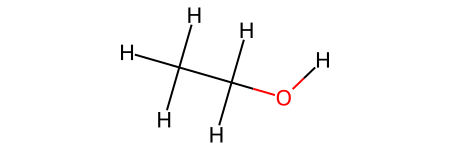

In [32]:
mol = Chem.AddHs(Chem.MolFromSmiles('CCO'))
mol

In [69]:
[ a.GetAtomicNum() for a in mol.GetAtoms() ]

[6, 6, 8]

In [26]:
a.GetAtomicNum()

6

In [27]:
coords

[[0.038333697995, -0.887482154869, 0.69388234621],
 [-0.631205021844, 0.467998838383, 0.966096159495],
 [-0.681305549352, -1.674550056584, 0.798035404905],
 [-0.283503421749, 1.341758681656, 2.016758948534],
 [0.621488257056, 1.208485029665, 2.425364587924],
 [-0.439468143873, 1.031806572206, 0.047398621041],
 [-1.720242818782, 0.459519083553, 1.068285413205],
 [0.463476733391, -0.850625760662, -0.41350214208],
 [0.856510911631, -1.016808878108, 1.603845419787]]

In [29]:
[ coords[i] for i in [3,4] ]

[[-0.283503421749, 1.341758681656, 2.016758948534],
 [0.621488257056, 1.208485029665, 2.425364587924]]

In [34]:
Chem.MolToXYZBlock(mol)

[14:34:07] Cannot write molecules with no conformers to XYZ block


''

In [47]:
mol=Chem.MolFromSmiles('C')

In [48]:
conf = Chem.Conformer(1)

In [49]:
conf.SetAtomPosition(0,Point3D(0,1,2))

In [50]:
mol.AddConformer(conf)

0

In [52]:
print(Chem.MolToXYZBlock(mol))

1

C      0.000000    1.000000    2.000000



In [53]:
block='''9

C         0.038333697995       -0.887482154869        0.693882346210
C        -0.631205021844        0.467998838383        0.966096159495
H        -0.681305549352       -1.674550056584        0.798035404905
O        -0.283503421749        1.341758681656        2.016758948534
H         0.621488257056        1.208485029665        2.425364587924
H        -0.439468143873        1.031806572206        0.047398621041
H        -1.720242818782        0.459519083553        1.068285413205
H         0.463476733391       -0.850625760662       -0.413502142080
H         0.856510911631       -1.016808878108        1.603845419787
'''

In [56]:
mol = Chem.MolFromXYZBlock(block)

In [57]:
Chem.SanitizeMol(mol)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

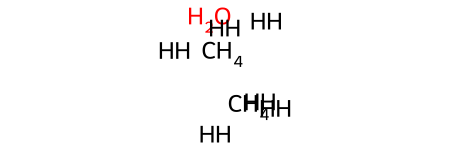

In [58]:
mol

In [78]:
AllChem.UFFGetMoleculeForceField(mol).CalcEnergy()

29.799456091513996

In [ ]:
Chem.Calc

In [70]:
mol=Chem.AddHs(mol)

[15:08:29] 

****
Pre-condition Violation
getNumImplicitHs() called without preceding call to calcImplicitValence()
Violation occurred on line 287 in file /project/build/temp.linux-x86_64-cpython-312/rdkit/Code/GraphMol/Atom.cpp
Failed Expression: d_implicitValence > -1
----------
Stacktrace:
----------
****



RuntimeError: Pre-condition Violation
	getNumImplicitHs() called without preceding call to calcImplicitValence()
	Violation occurred on line 287 in file Code/GraphMol/Atom.cpp
	Failed Expression: d_implicitValence > -1
	RDKIT: 2024.03.5
	BOOST: 1_85


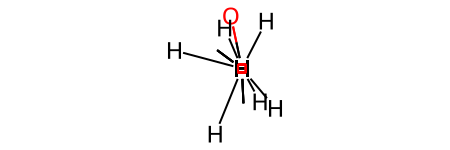

In [66]:
mol

In [67]:
[ a.GetAtomicNum() for a in mol.GetAtoms() ]

[6, 6, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [79]:
ff = AllChem.UFFGetMoleculeForceField(mol)
gradient = []
for i in range(mol.GetNumAtoms()):
    grad = ff.CalcGrad(i)
    gradient.append(grad)

# Print the energy gradient
for i, grad in enumerate(gradient):
    print(f'Atom {i}: Gradient = {grad}')

AttributeError: 'int' object has no attribute '__len__'

In [83]:
len(ff.CalcGrad())

27

In [7]:
import numpy as np
x = np.array('0.038333697995       -0.887482154869        0.693882346210'.split(),dtype=np.float32)

In [8]:
y = np.array('-0.631205021844        0.467998838383        0.966096159495'.split(),dtype=np.float32)

In [11]:
np.sqrt(np.sum((x-y)*(x-y)))

1.5361352

In [6]:
y

array(['-0.631205021844', '0.467998838383', '0.966096159495'],
      dtype='<U15')

In [12]:
x*0.529177210903

array([ 0.02028532, -0.4696353 ,  0.3671867 ], dtype=float32)

In [13]:
x/0.529177210903

array([ 0.07244019, -1.6770983 ,  1.3112477 ], dtype=float32)